# Import headers

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

# {Inputs}

In [2]:
ticker = 'intc'

eps_ttm             = 4.27                 # {yahoo finance}
pred_5y_growth_rate = 7.04                 # {yahoo finance}
hist_5y_growth_rate = 19.01                # {yahoo finance}
my_est_growth_rate  = 10                # your own prediction
pe_ratio_current    = 16.03                # {msn money}
pe_ratio_5y_high    = 17.14                # {msn money}
pe_ratio_5y_low     = 10.59                # {msn money}

fv_morning_star     = 70                # {morning star}

pe_ratio_5y_avg    = (pe_ratio_5y_high + pe_ratio_5y_low) / 2
pe_ratio_rule_1    = 2*hist_5y_growth_rate # Rule #1
est_pe_ratio       = min(pe_ratio_rule_1, pe_ratio_5y_avg)

string_len = 31
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Past 5yrs avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('PE from Historical growth rate', pe_ratio_rule_1, prec=string_len))
print('{:{prec}}: {} {}\n'.format('Estimated PE', est_pe_ratio, ' (Used for predicting fair value)', prec=string_len))

print('{:{prec}}: {}'.format('Historical growth rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Analysts predicted growth rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Custom predicted growth rate', my_est_growth_rate, prec=string_len))

Current PE                     : 16.03

Past 5yrs avg PE               : 13.865
PE from Historical growth rate : 38.02
Estimated PE                   : 13.865  (Used for predicting fair value)

Historical growth rate         : 19.01
Analysts predicted growth rate : 7.04
Custom predicted growth rate   : 10


# Estimate future intrinsic value 
**based on last 5 years avg pe ratio and estimated future eps**

In [3]:
# estimate future eps (for 10 years) based on current_eps and estimated_growth_rate
# future_eps = current_eps + (current_eps * growth_rate)

years_to_estimate_eps = 10 - 1 # first year is already known
est_eps_list   = [eps_ttm]

est_eps                             = eps_ttm
est_eps_my_growth_rate              = eps_ttm
est_eps_analysts_growth_rate        = eps_ttm

est_value_list                      = [eps_ttm * est_pe_ratio]
est_value_my_growth_rate_list       = [eps_ttm * est_pe_ratio]
est_value_analysts_growth_rate_list = [eps_ttm * est_pe_ratio]

for i in range(years_to_estimate_eps):
    est_eps = est_eps + (est_eps * hist_5y_growth_rate/100)
    est_eps_list.append(round(est_eps, 2))
    est_value_list.append(round(est_eps * est_pe_ratio, 2))
    
    est_eps_my_growth_rate = est_eps_my_growth_rate + (est_eps_my_growth_rate * my_est_growth_rate/100)
    est_value_my_growth_rate_list.append(round(est_eps_my_growth_rate * est_pe_ratio, 2))

    est_eps_analysts_growth_rate = est_eps_analysts_growth_rate + (est_eps_analysts_growth_rate * pred_5y_growth_rate/100)
    est_value_analysts_growth_rate_list.append(round(est_eps_analysts_growth_rate * est_pe_ratio, 2))

est_eps_series = pd.Series(est_eps_list, name='Est EPS', index=range(1,11))
est_value_series = pd.Series(est_value_list, name='Est Fair Value', index=range(1,11))
est_value_my_growth_rate_series = pd.Series(est_value_my_growth_rate_list, name='Est Fair Value (My Growth Rate)', index=range(1,11))

estimated_price_df = pd.DataFrame([est_eps_series, est_value_series, est_value_my_growth_rate_series]).T
# estimated_price_df

# Read fundamentals

In [4]:
df = pd.read_csv('data/{}.csv'.format(ticker), sep='|', parse_dates=True, index_col=0, header=None).T
df['Year'] = pd.to_datetime(df['Year'].astype('int32'), format='%Y', yearfirst=False)
df.set_index('Year', inplace=True)

df.head()

,Revenue,Revenue Growth,Gross Profit,Gross Margin,Operating Profit,Operating Margin,Earnings Per Share,EPS Growth,Return on Assets,Return on Equity,Return on Invested Capital,Equity Growth,Free Cash Flow Growth,Market Capitalization,Price-to-Earnings
Year,,,,,,,,,,,,,,,
2009-01-01,35127.0,-6.5,19561.0,55.7,5711.0,16.3,0.77,-16.3,8.4,10.8,14.1,5.5,16.2,114199.0,26.14
2010-01-01,43623.0,24.2,28491.0,65.3,14877.0,34.1,2.01,161.0,19.7,25.2,38.4,18.5,72.4,117095.0,10.21
2011-01-01,53999.0,23.8,33757.0,62.5,16897.0,31.3,2.39,18.9,19.3,27.1,38.0,-7.1,-11.7,128161.0,9.90
2012-01-01,53341.0,-1.2,33151.0,62.1,14108.0,26.4,2.13,-10.9,14.2,22.7,25.9,11.5,-30.5,103162.0,9.37
2013-01-01,52708.0,-1.2,31521.0,59.8,11505.0,21.8,1.89,-11.3,10.9,17.6,19.6,13.8,42.4,129333.0,13.44


# Inspect the datatypes

In [5]:
# df.dtypes

# Draw charts fn()

In [6]:
def draw_chart(data, columns, title, mark_green_zone=(False, 15), draw_mean=False):
    fig, ax = plt.subplots(1,1, figsize=(16,8))
    ax.set_title(title)
    fig.tight_layout()
    
    for c in columns:
        plt.plot(data[c], marker='o', linestyle='-', label=c)

    if mark_green_zone[0]:
        ax.axhspan(ymin=0, ymax=mark_green_zone[1], color='green', fill=True, alpha=.1)
        
    if draw_mean:
        plt.plot(df[columns].mean(1), marker=',', linestyle='--', label='Average Growth', color='gray')

    ax.legend()
    plt.show()

# Fundamentals

0           Revenue Growth  EPS Growth  Free Cash Flow Growth  Equity Growth
Year                                                                        
2009-01-01            -6.5       -16.3                   16.2            5.5
2010-01-01            24.2       161.0                   72.4           18.5
2011-01-01            23.8        18.9                  -11.7           -7.1
2012-01-01            -1.2       -10.9                  -30.5           11.5
2013-01-01            -1.2       -11.3                   42.4           13.8
2014-01-01             6.0        22.2                    2.8           -2.5
2015-01-01            -0.9         0.9                   13.4            9.2
2016-01-01             7.3        -9.0                    4.2            8.3
2017-01-01             5.7        -6.1                  -15.2            4.1
2018-01-01            12.9       125.1                   37.9            7.3


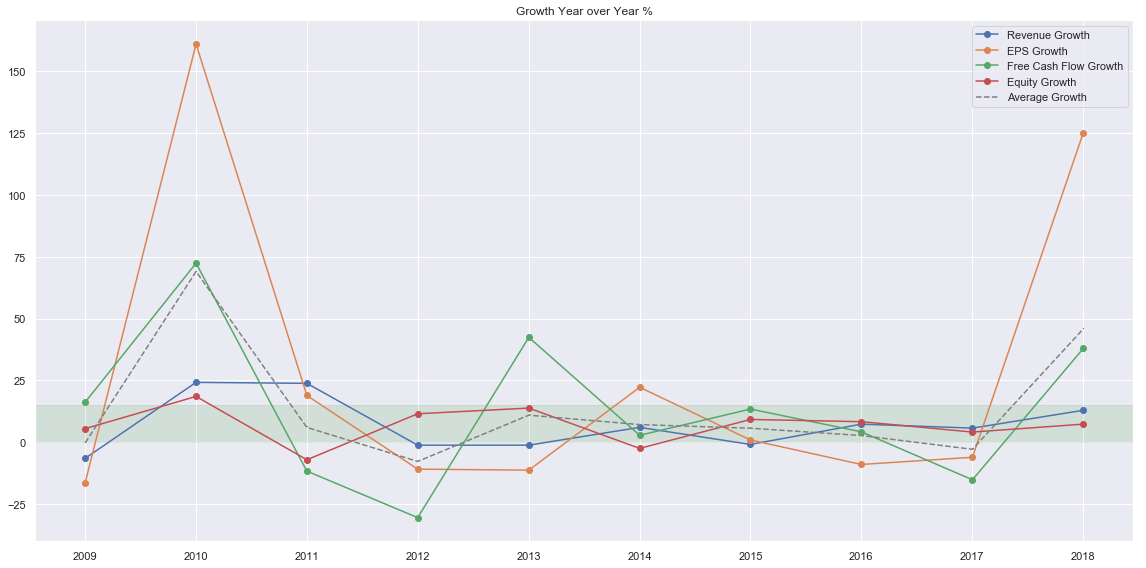

In [7]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

# print('All 4 growth rates should be >15%')

print(df[columns])

draw_chart(df, columns, title='Growth Year over Year %', mark_green_zone=(True, 15), draw_mean=True)

# Returns

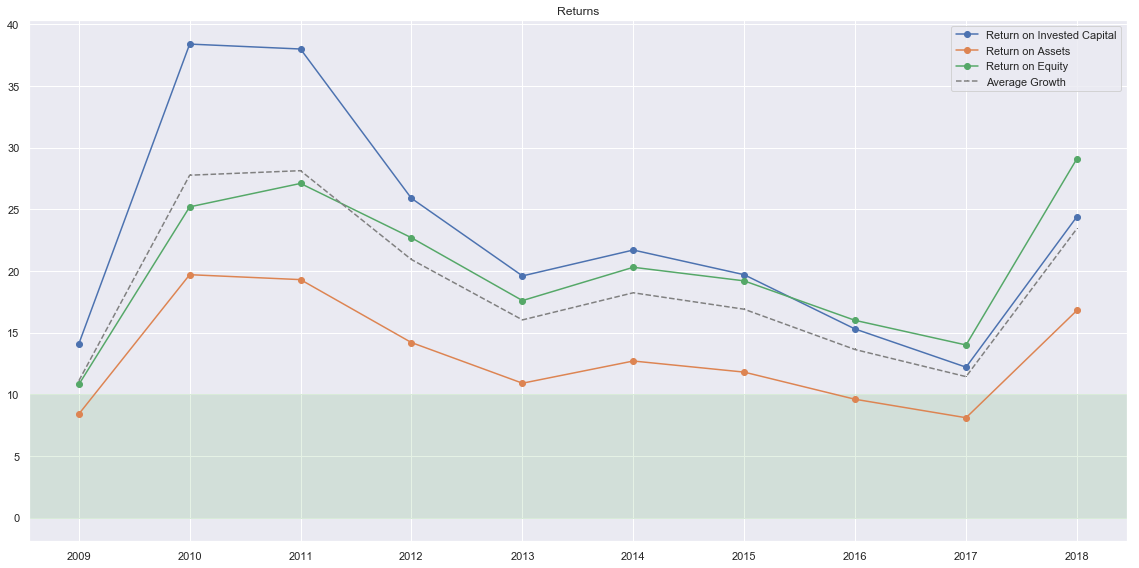

In [8]:
columns = ['Return on Invested Capital',
           'Return on Assets',
           'Return on Equity']

draw_chart(df, columns, title='Returns', mark_green_zone=(True, 10), draw_mean=True)

# ROIC: should be >10%
# ROE : should be +ve

# PE

0           Price-to-Earnings
Year                         
2009-01-01              26.14
2010-01-01              10.21
2011-01-01               9.90
2012-01-01               9.37
2013-01-01              13.44
2014-01-01              15.35
2015-01-01              14.34
2016-01-01              16.62
2017-01-01              22.50
2018-01-01              10.17


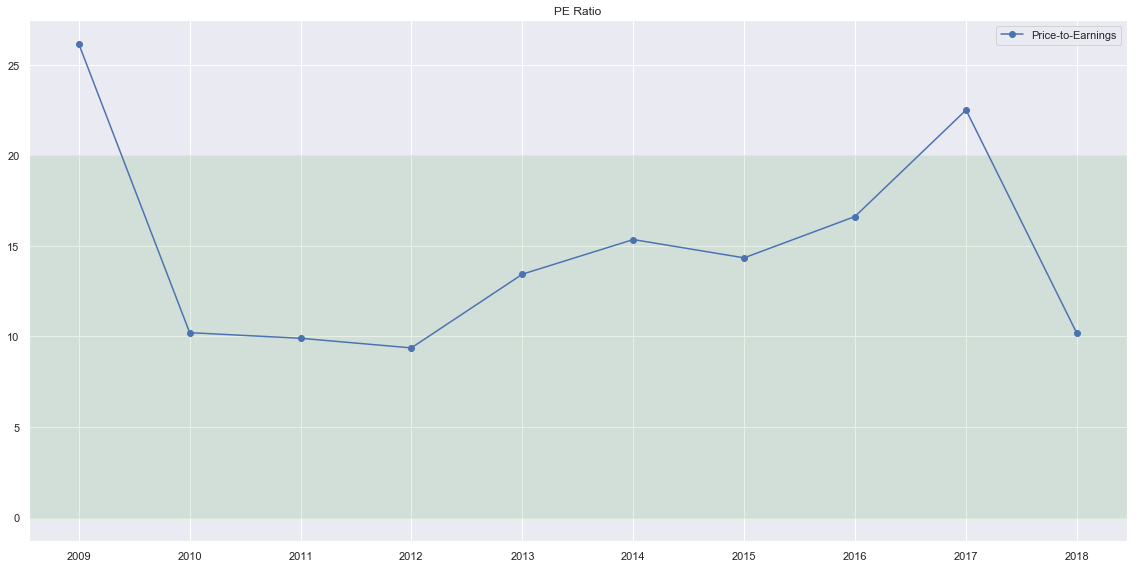

In [9]:
columns = ['Price-to-Earnings']

print(df[columns])
draw_chart(df, columns, title='PE Ratio', mark_green_zone=(True, 20))

# PE ratio: Lower is better. Compare with competators.
# EPS     : Should be +ve

# Market Cap

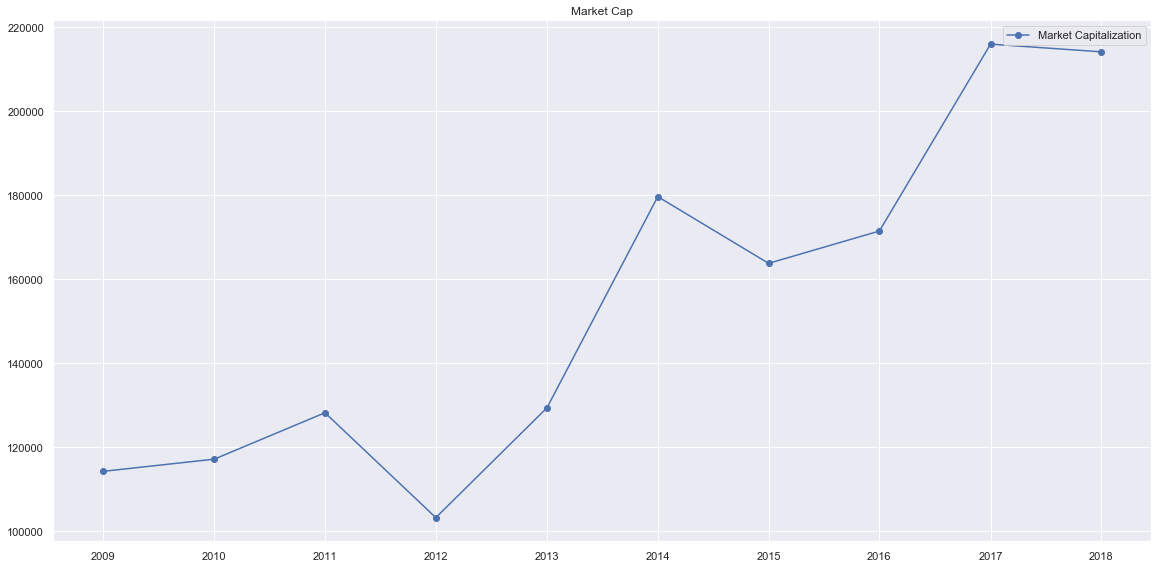

In [10]:
columns = ['Market Capitalization']
draw_chart(df, columns, title='Market Cap')

# Estimated Fair Value

    Est EPS  Est Fair Value  Est Fair Value (My Growth Rate)
1      4.27        59.20355                         59.20355
2      5.08        70.46000                         65.12000
3      6.05        83.85000                         71.64000
4      7.20        99.79000                         78.80000
5      8.57       118.76000                         86.68000
6     10.19       141.34000                         95.35000
7     12.13       168.21000                        104.88000
8     14.44       200.19000                        115.37000
9     17.18       238.24000                        126.91000
10    20.45       283.53000                        139.60000


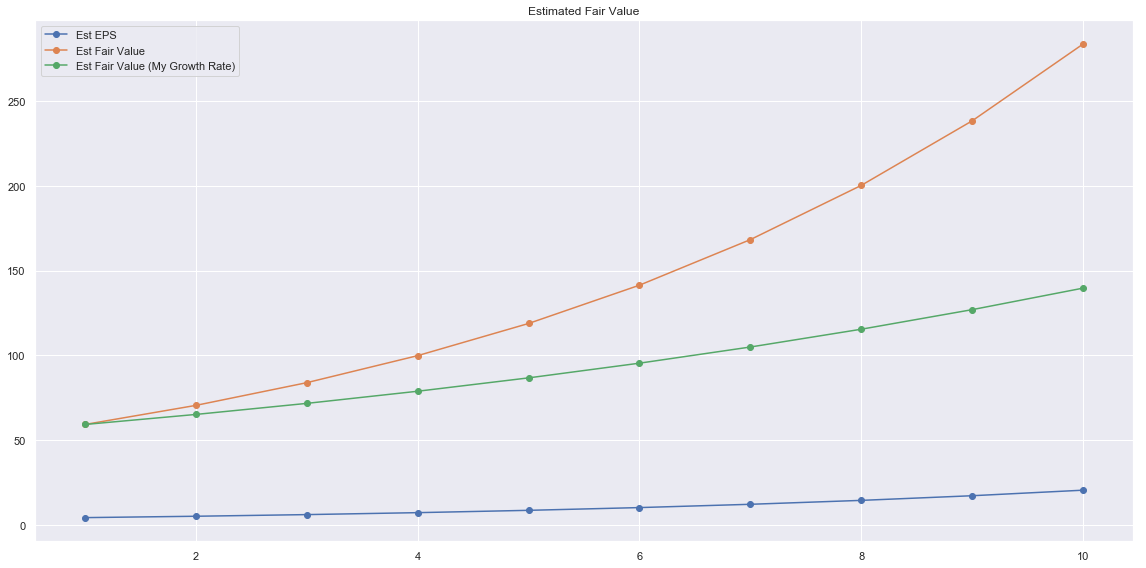

In [11]:
columns = ['Est EPS', 'Est Fair Value', 'Est Fair Value (My Growth Rate)']
print(estimated_price_df)
draw_chart(estimated_price_df, columns, title='Estimated Fair Value')

In [12]:
columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']
df[columns].mean(1)[-1]

45.800000000000004

# Look at some numbers

In [13]:
# At buying point, current PE should be less than
# - historical average PE
# - 2x analysts 5y growth rate prediction {yahoo finance}
# - 2x historical equity growth rate      {}
# - 2x last years average growth rate (revenue, equity, fcf, eps)

columns = ['Revenue Growth',
           'EPS Growth',
           'Free Cash Flow Growth',
           'Equity Growth']

string_len = 33
print('{:{prec}}: {}\n'.format('Current PE', pe_ratio_current, prec=string_len))

print('{:{prec}}: {}'.format('Historical avg PE', pe_ratio_5y_avg, prec=string_len))
print('{:{prec}}: {}'.format('Historical Growth Rate', hist_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Predicted Growth Rate', pred_5y_growth_rate, prec=string_len))
print('{:{prec}}: {}'.format('Historical Equity Growth Rate', df['Equity Growth'].mean(), prec=string_len))
print('{:{prec}}: {}'.format('Last Years Avg Growth Rate', df[columns].mean(1)[-1], prec=string_len))

Current PE                       : 16.03

Historical avg PE                : 13.865
Historical Growth Rate           : 19.01
Predicted Growth Rate            : 7.04
Historical Equity Growth Rate    : 6.860000000000001
Last Years Avg Growth Rate       : 45.800000000000004


# Fair Value prediction

In [14]:
fv_historic_pe = round(eps_ttm * pe_ratio_5y_avg, 2)
fv_historic_growth = round(eps_ttm * (2*hist_5y_growth_rate), 2)
fv_analysts_prediction = round(eps_ttm * (2*pred_5y_growth_rate), 2)

string_len = 47
print('{:{prec}}: {}'.format('Fair Value (Morning Star)', fv_morning_star, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Avg PE (msn))', fv_historic_pe, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Historic Growth (yahoo))', fv_historic_growth, prec=string_len))
print('{:{prec}}: {}'.format('Fair Value (Analysts predicted Growth (yahoo))', fv_analysts_prediction, prec=string_len))

Fair Value (Morning Star)                      : 70
Fair Value (Historic Avg PE (msn))             : 59.2
Fair Value (Historic Growth (yahoo))           : 162.35
Fair Value (Analysts predicted Growth (yahoo)) : 60.12


# Verdict: Bye bellow {50}